In [1]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:


####################Image Load,Display,Save#########################
def destroy():
    cv2.destroyAllWindows()

def display(image,title = 'Image', display_tim = 2500):
    cv2.imshow(title,image)
    cv2.waitKey(display_tim)


In [3]:

####################Image preprocessing oprations#####################

def resize(image, hnew = 300, interpolation = cv2.INTER_AREA):
    #Compute new width . Aspect ratio must be unchanged
    hold = image.shape[0]
    wold = image.shape[1]
    aspect_ratio = wold*1./hold
    wnew = int(hnew*aspect_ratio)
    new_dim = (wnew,hnew)
    #Resize
    return cv2.resize(image,new_dim,interpolation = cv2.INTER_AREA)



def convert_to_gray(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


def blur(grey_image, k=3 ):
    #Only pass gray scaled image
    return cv2.GaussianBlur(grey_image,(k,k),0)

In [4]:


###########################Masking#########################

def masking(image,mask_type = 'c'):
    #Width comes first when entering data to opencv
    cx = image.shape[1]/2
    cy = image.shape[0]/2

    center = (cx,cy)
    canvas = np.zeros(image.shape[:2],dtype = 'uint8')
    white  = (255,255,255)

    #Radius should be equal to the half the image width to get the dial
    #since our watch dials are touching the image edges

    if mask_type == 'c':
        radius  = image.shape[1]*2/3
        cv2.circle(canvas,center,radius,white,-1)

    if mask_type == 'r':
        #Since image is like a grid with top left corner as origin and width argument comes first
        #Width here is width of the entire image
       #We are going to get a rectangle which covers 2/3 of entire image size

        start_pt = (0 , cy - int(0.33*image.shape[0]))
        end_pt =  (image.shape[1],cy + int(0.33*image.shape[0]))
        cv2.rectangle(canvas,start_pt,end_pt,white,-1)
    return canvas

def bitwise_operations(image,mask):
    return cv2.bitwise_and(image,image,mask = mask)




In [5]:

#########################Dominant color and feature extraction####################




def grey_hist_feat(image):
    img_g = convert_to_gray(image)
    img_gb = blur(img_g,3)
    hist = cv2.calcHist(image,[0],None,[256],[0,256])
    plt.title("Gray Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    return hist

def col_hist_feat(image,mask = None,plot = False, feat = False):
    bgr = cv2.split(image)
    col = ('b','g','r')
    plt.figure()
    plt.title("Flattened Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.xlim([0, 256])
    
    features = []
    for (chan, color) in zip(bgr, col):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        #if plot:
        plt.plot(hist, color = color)
        features.extend(hist)
    plt.show()    
    if feat:
        return  features

def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 255])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])



def preprocess(image):
        new_image = resize(image)
        mask_canvas_rect = masking(new_image , 'r')
        mask_canvas = masking(new_image , 'c')
        return mask_canvas,mask_canvas_rect,new_image


    


In [6]:
#image = cv2.imread("/Users/Iskandar/Desktop/Project/testimages/9.jpg")#Circular
image = cv2.imread("/Users/Iskandar/Desktop/Project/testimages/459.jpg")#Rectangular
circ_mask,rect_mask, new_image = preprocess(image)

destroy()

display(new_image,"resized_image",2500)

display(circ_mask, "mask_circ",2500)
display(rect_mask, "mask_rect",2500)

imgc = bitwise_operations(new_image,circ_mask)
imgr = bitwise_operations(new_image,rect_mask)

#features = col_hist_feat(imgc,rect_mask,True)


In [7]:
destroy()

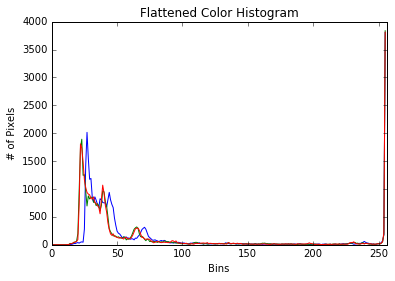

In [9]:
col_hist_feat(new_image,rect_mask,plot= True)

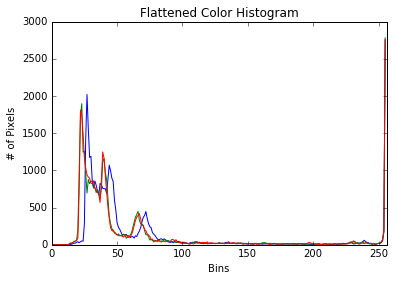

In [10]:
col_hist_feat(new_image,circ_mask,plot= True)

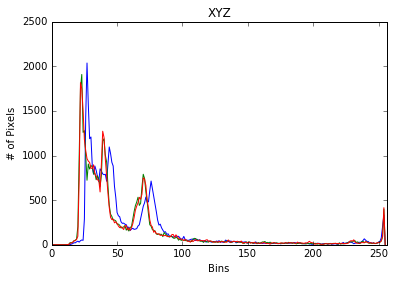

In [16]:
plot_histogram(new_image,"XYZ",mask = None)

array([[    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.

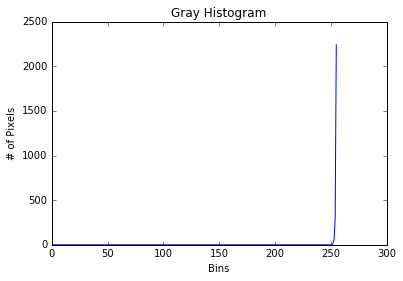

In [17]:
grey_hist_feat(image)

In [11]:

############################# Componet images for PCA
def scree_plot(pca, title=None):
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35,
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    for i in xrange(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind,
                       fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)


In [12]:
def pca(img,*args):
    #standarize the data before pca
    img = convert_to_gray(img)
    scale = StandardScaler()
    img_scaled  =  scale.fit_transform(img)

    pca_model = PCA(n_components=100)
    #features
    pca_data = pca_model.fit_transform(img_scaled )

    scree_plot(pca_model)
    plt.show()
    return (pca_model.explained_variance_ratio_)



/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


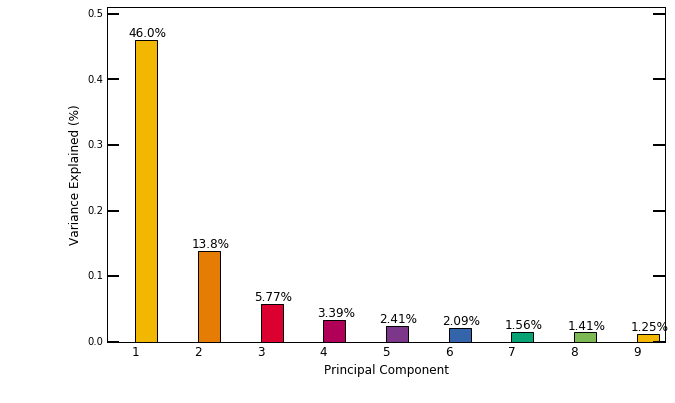

In [13]:
var = pca(image)

/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


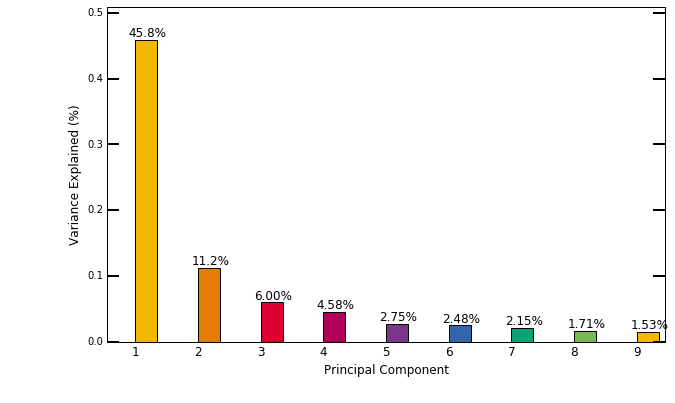

In [14]:
image2=cv2.imread("/Users/Iskandar/Desktop/Project/testimages/169.jpg")#Rectangular
var2 =pca(image2)

In [15]:
sum =0
for i in range(len(var)):
        sum += var[i]
        print i,sum
  

0 0.460244341683
1 0.598488866993
2 0.656213795609
3 0.690119845787
4 0.714230945161
5 0.73513152794
6 0.750803412361
7 0.764983273745
8 0.777548527334
9 0.789693277553
10 0.799947150112
11 0.809888034188
12 0.818576703026
13 0.827008039525
14 0.834884696048
15 0.842071683586
16 0.849054031115
17 0.855332260454
18 0.861227938902
19 0.866192556373
20 0.870919944227
21 0.875376079749
22 0.879704136778
23 0.883663308161
24 0.887550127427
25 0.8910200814
26 0.89431603552
27 0.897421803735
28 0.900280458794
29 0.903001857421
30 0.905673569863
31 0.908293133124
32 0.910841627226
33 0.913205578582
34 0.915469991302
35 0.917699330562
36 0.919822850011
37 0.921830886971
38 0.923759987439
39 0.925644345503
40 0.927413470612
41 0.929173991146
42 0.93083773284
43 0.93244192205
44 0.934019810866
45 0.935539692041
46 0.93702976409
47 0.938512222538
48 0.93992616853
49 0.941214650249
50 0.942483946397
51 0.943742749544
52 0.944953243292
53 0.946128677192
54 0.947296766409
55 0.948432142889
56 0.94953

In [16]:
sum =0
for i in range(len(var2)):
        sum += var2[i]
        print i,sum
  

0 0.458778142988
1 0.571481089327
2 0.631496907427
3 0.6773028117
4 0.704901453263
5 0.729730619854
6 0.751273557502
7 0.768440378463
8 0.783775288081
9 0.797147742269
10 0.808371033843
11 0.818343298899
12 0.827354551975
13 0.835821039242
14 0.843678599182
15 0.851018050148
16 0.857463346044
17 0.863106927274
18 0.868167341422
19 0.873037321927
20 0.877153259828
21 0.881042510795
22 0.884816807507
23 0.888281502465
24 0.891442116157
25 0.894434330262
26 0.897368821718
27 0.900204564213
28 0.902857338918
29 0.905417423337
30 0.907833379444
31 0.910039498116
32 0.912122807603
33 0.914161106982
34 0.916127480251
35 0.917975972801
36 0.919701148918
37 0.92140902554
38 0.923014155834
39 0.924555134872
40 0.926061636808
41 0.927545856267
42 0.92894204787
43 0.930315366192
44 0.931649919023
45 0.932928851664
46 0.934163314177
47 0.935376701973
48 0.936495783471
49 0.937576952122
50 0.938647965451
51 0.93970803925
52 0.940733033839
53 0.94174725953
54 0.942739589582
55 0.943697467606
56 0.944

/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


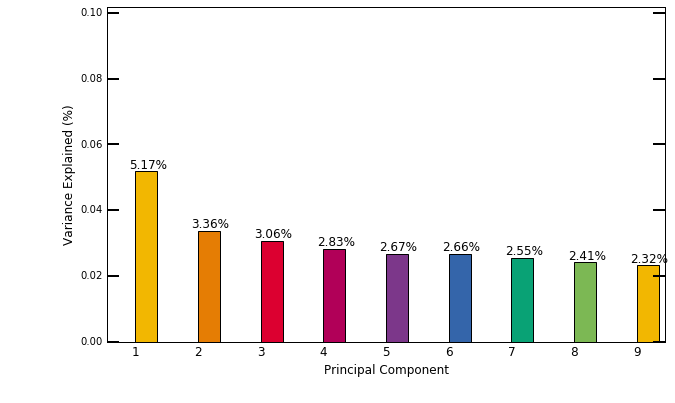

0 0.051778322301
1 0.0854659230785
2 0.116079180734
3 0.144390963993
4 0.171176594908
5 0.197776914672
6 0.223361195439
7 0.24750124863
8 0.270736309295
9 0.293121977204
10 0.314633449058
11 0.33601637208
12 0.356301327485
13 0.375941688065
14 0.39522338075
15 0.413155665946
16 0.430268469128
17 0.446864656405
18 0.463275206453
19 0.478632216929
20 0.493762906959
21 0.508691863814
22 0.523409705553
23 0.537578684078
24 0.551683723754
25 0.565169654691
26 0.577780379464
27 0.590095824196
28 0.602399556564
29 0.614348178884
30 0.626132694965
31 0.637431430053
32 0.648295807082
33 0.659008005049
34 0.669467623225
35 0.679699948816
36 0.689879615466
37 0.699395623037
38 0.708781975066
39 0.718062167492
40 0.727026187325
41 0.735859801276
42 0.744260296154
43 0.752417689468
44 0.760264376165
45 0.768024420813
46 0.775262531108
47 0.782413796949
48 0.789350453274
49 0.796088779362
50 0.802694597347
51 0.809087491875
52 0.81545265664
53 0.821592602512
54 0.82758736945
55 0.833425340975
56 0.8

In [17]:
image3=cv2.imread("/Users/Iskandar/Desktop/Project/testimages/4.jpg")#Rectangular
var3 =pca(image3)
sum =0
for i in range(len(var3)):
        sum += var3[i]
        print i,sum

/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


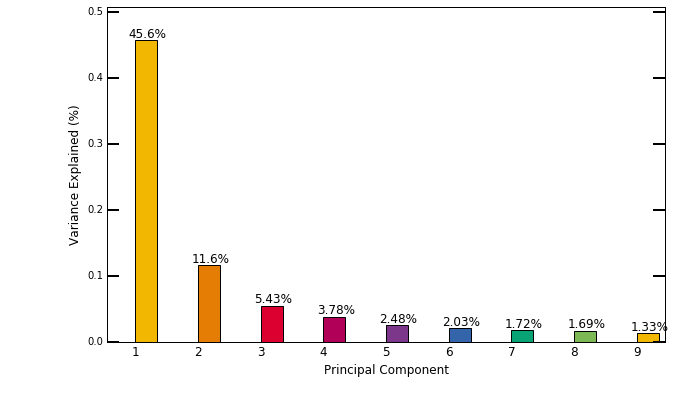

0 0.456975352096
1 0.573036209254
2 0.627414713865
3 0.665296117551
4 0.690160666954
5 0.71053052603
6 0.727736047896
7 0.744719938979
8 0.758067375741
9 0.770375852526
10 0.780446236687
11 0.789101367339
12 0.797097132279
13 0.804545000791
14 0.811027101363
15 0.817061727817
16 0.822930465305
17 0.828512058168
18 0.833610137544
19 0.838355514555
20 0.842915083129
21 0.847243417179
22 0.8514284061
23 0.855387404296
24 0.859255260617
25 0.863005160139
26 0.866415228595
27 0.869724980955
28 0.872891850112
29 0.875910765453
30 0.878844581519
31 0.881737433668
32 0.884407117721
33 0.887021327969
34 0.889539854227
35 0.891991898506
36 0.894327590698
37 0.896623527445
38 0.898897885523
39 0.901072054423
40 0.903200694235
41 0.905241879686
42 0.907184722242
43 0.909104786216
44 0.910901814833
45 0.912671053095
46 0.914386567141
47 0.91602087109
48 0.917638947632
49 0.919225294231
50 0.92077528929
51 0.922273735765
52 0.923717080975
53 0.925103010612
54 0.926475872191
55 0.927837385512
56 0.92

In [18]:
image3=cv2.imread("/Users/Iskandar/Desktop/Project/testimages/809.jpg")#Rectangular
var3 =pca(image3)
sum =0
for i in range(len(var3)):
        sum += var3[i]
        print i,sum

/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Iskandar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


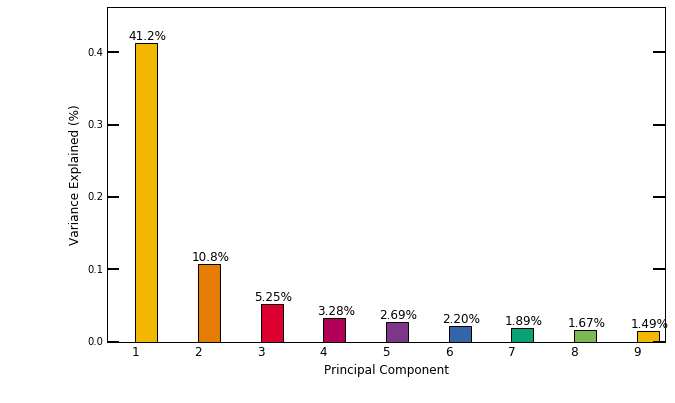

0 0.412843834808
1 0.520934585227
2 0.573467321349
3 0.606324158844
4 0.633318819315
5 0.655391586162
6 0.674351880097
7 0.691081661362
8 0.706063732362
9 0.717072265713
10 0.726930917621
11 0.735629185186
12 0.743137045598
13 0.750237201721
14 0.756743105079
15 0.762784814041
16 0.768610965378
17 0.773970301917
18 0.779004253051
19 0.783862856338
20 0.788388461946
21 0.792680910904
22 0.796573329011
23 0.800356773559
24 0.803926055452
25 0.807333298522
26 0.810686235928
27 0.813988889509
28 0.817119666716
29 0.820218883437
30 0.823159455251
31 0.825936415306
32 0.828579834893
33 0.831119283714
34 0.833532327179
35 0.835915979107
36 0.838226978443
37 0.840482988419
38 0.842635142339
39 0.844721571881
40 0.846767832213
41 0.84876804936
42 0.85075808177
43 0.852662903327
44 0.854471300039
45 0.856268384339
46 0.858049947692
47 0.85973499397
48 0.861400230015
49 0.863010670749
50 0.864579834882
51 0.866126715828
52 0.867608007066
53 0.869054837897
54 0.870486355529
55 0.871897142412
56 0.

In [19]:
image3=cv2.imread("/Users/Iskandar/Desktop/Project/data/387/387.jpg")#Rectangular
var3 =pca(image3)
sum =0
for i in range(len(var3)):
        sum += var3[i]
        print i,sum